In [106]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv('https://github.com/MyungKyuYi/AI-class/raw/refs/heads/main/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [108]:
df = df.drop(columns = ['id'])
df = df.drop(columns = ['date'])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [109]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [110]:
X = df.drop(columns = ['price']).values
y = df['price'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X, y

(array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.30607896,
         -0.9433552 , -0.26071541],
        [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.74634143,
         -0.43268619, -0.18786773],
        [-1.47395936, -1.44746357, -1.42625404, ..., -0.13565477,
          1.07013975, -0.17237524],
        ...,
        [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
         -1.41025258, -0.39414129],
        [-0.39873715,  0.50022075, -0.52252773, ...,  1.02891048,
         -0.8412214 , -0.42051149],
        [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
         -1.41025258, -0.41794772]]),
 array([221900., 538000., 180000., ..., 402101., 400000., 325000.]))

In [111]:
Y = pd.get_dummies(y).values
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1557)
print("학습 데이터 개수:", len(X_train))
print("테스트 데이터 개수:", len(y_train))

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

학습 데이터 개수: 17290
테스트 데이터 개수: 17290
(17290, 18) (4323, 18)
(17290, 4028) (4323, 4028)


In [113]:
model = Sequential()

model.add(Dense(10, input_shape = (18, ), activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))

model.compile(RMSprop(learning_rate=0.04), loss='mean_squared_error', metrics=['mse'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                190       
                                                                 
 dense_13 (Dense)            (None, 12)                132       
                                                                 
 dense_14 (Dense)            (None, 12)                156       
                                                                 
 dense_15 (Dense)            (None, 6)                 78        
                                                                 
 dense_16 (Dense)            (None, 1)                 7         
                                                                 
Total params: 563
Trainable params: 563
Non-trainable params: 0
_________________________________________________________________


In [114]:
model_history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split = 0.1)

Epoch 1/30
487/487 [==============================] - 4s 5ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 6.4820e-04 - val_mse: 6.4820e-04
Epoch 2/30
487/487 [==============================] - 2s 4ms/step - loss: 6.4820e-04 - mse: 6.4820e-04 - val_loss: 6.4820e-04 - val_mse: 6.4820e-04
Epoch 3/30
487/487 [==============================] - 2s 4ms/step - loss: 6.4820e-04 - mse: 6.4820e-04 - val_loss: 6.4820e-04 - val_mse: 6.4820e-04
Epoch 4/30
487/487 [==============================] - 2s 4ms/step - loss: 6.4820e-04 - mse: 6.4820e-04 - val_loss: 6.4820e-04 - val_mse: 6.4820e-04
Epoch 5/30
487/487 [==============================] - 2s 4ms/step - loss: 6.4820e-04 - mse: 6.4820e-04 - val_loss: 6.4820e-04 - val_mse: 6.4820e-04
Epoch 6/30
487/487 [==============================] - 2s 4ms/step - loss: 6.4820e-04 - mse: 6.4820e-04 - val_loss: 6.4820e-04 - val_mse: 6.4820e-04
Epoch 7/30
487/487 [==============================] - 2s 4ms/step - loss: 6.4820e-04 - mse: 6.4820e-04 - val_loss: 6.482

136/136 [==============================] - 0s 2ms/step


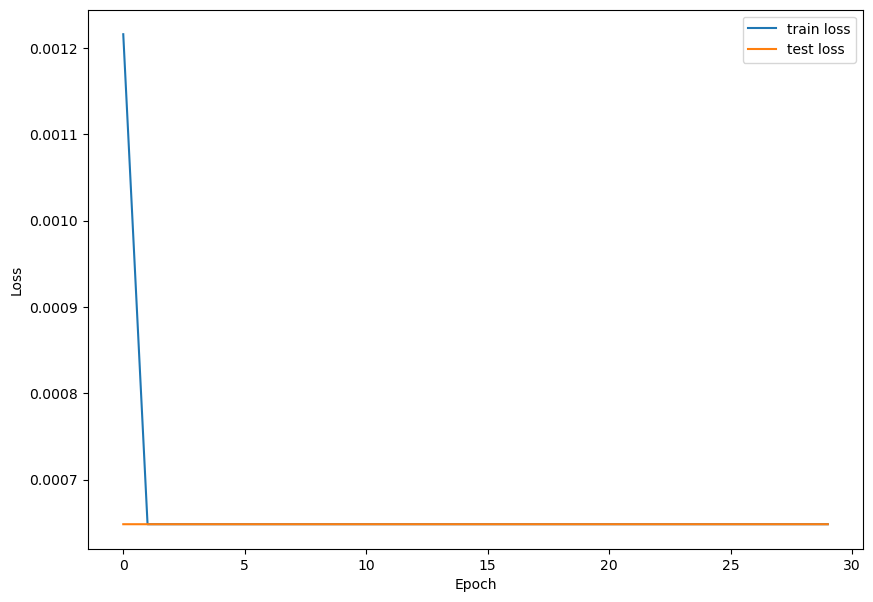

In [115]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10,7))
plt.plot(range(30), model_history.history['loss'], label='train loss')
plt.plot(range(30), model_history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [116]:
model.evaluate(X_test, y_test)

136/136 [==============================] - 0s 3ms/step - loss: 6.4820e-04 - mse: 6.4820e-04


[0.0006481980090029538, 0.0006481980090029538]